# Viscoelastic Oldroyd-B model -- axi-symmetric Couette flow

## Introduction to viscoelastic Oldroyd-B model
We deal with the viscoelastic Oldroyd-B model (Oldroyd, 1950). It is a model for material that exhibits both viscous and elastic behavior. For simplicity we can imagine it one dimension using the mechanical analogs: a linear spring and a linear dashpot, see the Figure below.<p>
<div>
<img src="fig/spring-dashpot.png" width="550"/>
</div>

The linear spring represents an elastic material whose relation between the one-dimensional stress $\sigma$ and one-dimensional strain $\varepsilon$ reads
$$
\sigma=G \varepsilon,
$$
where $G$ is the elastic modulus of the spring. The linear dashpot represents the Newtonian fluid with the relation
$$
\sigma=\mu\dot{\varepsilon},
$$
where $\mu$ is the fluid viscosity.

Thus, if we assume that all points of the material consist just from the dashpots, we have a Newtonian fluid; if we assume that all points conisist only from the springs we obtain an elastic solid. In case of viscoelastic fluids we create a mixture of springs and dashpots. The Oldroyd mechanical analog consists of one spring and one dashpot connected to series (called Maxwell analog), and an additional dashpot that is attached in paralel, see the Figure below.<p>
<div>
<img src="fig/Oldroyd-analog.png" width="400"/>
</div>
To get the relation between total stres $\sigma$ and total strain $\varepsilon$, we realize that
\begin{align*}
\sigma&=\sigma_{\rm D_2} + \sigma_{\rm M},\qquad&{\rm and}&&\qquad \varepsilon&=\varepsilon_{\rm D_2}=\varepsilon_{\rm M},\\
\sigma_{\rm M}&=\sigma_{\rm D_1}=\sigma_{\rm S},\qquad&{\rm and}&&\qquad\varepsilon_{\rm M}&=\varepsilon_{\rm D_1}+\varepsilon_{\rm S}.
\end{align*}
By straightforward manipulation we get the relation for the Maxwell analog, i.e.
\begin{align*}
\dot{\varepsilon}_{\rm M}&=\dot{\varepsilon}_{\rm D_1}+\dot{\varepsilon}_{\rm S}\\
&=\frac{\sigma_{\rm D_1}}{\mu}+\frac{\dot{\sigma}_{\rm S}}{G}\\
&=\frac{\sigma_{\rm M}}{\mu_1}+\frac{\dot{\sigma}_{\rm M}}{G},
\end{align*}
or we can write it a slightly different way
$$
\dot{\sigma}_{\rm M}+\frac{G}{\mu_1}\sigma_{\rm M}=G\dot{\varepsilon}_{\rm M}.
$$
Then, the stress-strain relation for the Oldroyd one-dimensional analog simply reads
\begin{align*}
\sigma=\mu_2\dot{\varepsilon}+\sigma_{\rm M},\\
\dot{\sigma}_{\rm M}+\frac{G}{\mu_1}\sigma_{\rm M}&=G\dot{\varepsilon}_{\rm M}.
\end{align*}
However, we obtained only the relation between the stress and strain in one dimension. The journey to a fully three-dimensional model is long and it is beyond the scope of this FEniCS tutorial. In short, in the fully three-dimensional Oldroyd-B model, the one-diemnsional stress $\sigma$ is replaced by the Cauchy stress $\mathbb{T}$, $\dot{\varepsilon}$ by the symmetric part of the velocity gradient $\mathbb{D}$ and the simple derivative by the objective upper convected Oldroyd derivative that transforms correctly under the change of observer. The Cauchy stress tensor $\mathbb{T}$ for the Oldroyd-B model reads
\begin{align*}
\mathbb{T}&=-p\mathbb{I}+2\mu_2\mathbb{D}+\mathbb{A},\\
\frac{\partial \mathbb{A}}{\partial t}+{\bf v}\cdot\nabla\mathbb{A}-(\nabla{\bf v})\mathbb{A}-\mathbb{A}(\nabla{\bf v})^{\rm T}+\frac{G}{\mu_1}\mathbb{A}&=2G\mathbb{D}.
\end{align*}

Finally, the full set of governing equations for the Oldroyd-B model read
\begin{align*}
{\rm div}\,{\bf v}&=0,\\
\rho\left(\frac{\partial{\bf v}}{\partial t}+({\bf v}\cdot\nabla){\bf v}\right)&={\rm div}\,\mathbb{T},\quad
\mathbb{T}=-p\mathbb{I}+2\mu_2\mathbb{D}+\mathbb{A},\\
\frac{\partial \mathbb{A}}{\partial t}+{\bf v}\cdot\nabla\mathbb{A}-(\nabla{\bf v})\mathbb{A}-\mathbb{A}(\nabla{\bf v})^{\rm T}+\frac{G}{\mu_1}\mathbb{A}&=2G\mathbb{D}.
\end{align*}

Very often the model is rewritten in the form where $\mathbb{A}=G(\mathbb{B}-\mathbb{I})$. The model then transforms to
\begin{align*}
{\rm div}\,{\bf v}&=0,\\
\rho\left(\frac{\partial{\bf v}}{\partial t}+({\bf v}\cdot\nabla){\bf v}\right)&={\rm div}\,\mathbb{T},\quad
\mathbb{T}=-p\mathbb{I}+2\mu_2\mathbb{D}+G(\mathbb{B}-\mathbb{I}),\\
\frac{\partial \mathbb{B}}{\partial t}+{\bf v}\cdot\nabla\mathbb{B}-(\nabla{\bf v})\mathbb{B}-\mathbb{B}(\nabla{\bf v})^{\rm T}+\frac{G}{\mu_1}(\mathbb{B}-\mathbb{I})&=\mathbb{O}.
\end{align*}

## Problem description

We test our finite element implementation on a problem for which we have a non-trivial analytical solution -- the problem of axi-symmetric steady Couette flow. The domain $\Omega$ is bordered with two concentric circles, radius of the inner one is 1 m, radius of
the outer one is 2 m, the material flows inside these two circles and fully sticks to both boundaries. The inner circle is fixed and does not move, the outer one rotates with constant angular velocity $\omega = 0.5$ rad s$^{-1}$, thus the fluid rotates with it. The problem is depicted in the Figure below.<p>
<div>
<img src="fig/problem-Couette.png" width="300"/>
</div>

To obtain the analytical solution, we employ the polar coordinates, we assume that all unknowns $p, {\bf v}, \mathbb{B}$ depend only on the radial coordinate $r$ and the fluid flows only in the direction of rotation, i.e.
$$
{\bf v}=(0, v_{\varphi}(r)).
$$
If we fix the pressure $p=0$ at the inner circle, the analytical solution reads
\begin{align*}
v_{\varphi}&=\frac23\left(r-\frac{1}{r}\right),\\
p&=\frac{4\rho}{9}\left(\frac{r^2}{2}-2\ln r - \frac{1}{2r^2}\right)+\frac{8}{9}\left(\frac{\mu_1^2}{G r^4}-1\right),\\
B_{rr}&=1,\quad B_{r\varphi}=\frac{4\mu_1}{3G r^2},\quad B_{\varphi\varphi}=1+\frac{32\mu_1^2}{9G^2 r^4}.
\end{align*}

## Weak formulation

Since we are interested in the steady solution, we omit the time derivatives, test the corresponding equations by the test arbitrary functions $(q, {\bf q}, \mathbb{Q})$, integrate over $\Omega$ and use the divergence theorem
\begin{align*}
&\int_\Omega \mathrm{div}\,\mathbf{v} \,  q\; \mathrm{d}\mathbf{x} = 0,\\
&\int_\Omega (\rho\mathbf{v}\cdot\nabla\mathbf{v})\cdot\mathbf{q}\; \mathrm{d}\mathbf{x} + \int_\Omega \mathbb{T}\cdot\nabla\mathbf{q}\; \mathrm{d}\mathbf{x} = 0,\\
&\int_\Omega \left({\bf v}\cdot\nabla\mathbb{B}-(\nabla{\bf v})\mathbb{B}-\mathbb{B}(\nabla{\bf v})^{\rm T}+\frac{G}{\mu_1}(\mathbb{B}-\mathbb{I})\right)\cdot\mathbb{Q}=0,
\end{align*}
where
$$
\mathbb{T}=-p\mathbb{I}+2\mu_2\mathbb{D}+G(\mathbb{B}-\mathbb{I}).
$$
Here, we imposed that $\mathbf{v}$ vanishes on the Dirichlet boundaries $\Gamma_\mathrm{in}$, $\Gamma_\mathrm{out}$.

This non-linear problem is now solved using the FEniCS and compared to the analytical solution.

## FEniCS implementation

Import **dolfin** (FEniCS backend), **matplotlib.pyplot** (for plots), **numpy** (for arrays) and **time** (for benchmarking).

In [1]:
import dolfin as df
import matplotlib.pyplot as plt
import numpy as np
from time import time

Create mesh.

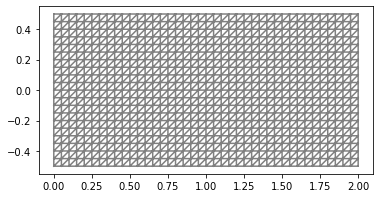

In [2]:
R = 0.5    # half of distance between plates
L = 2.0    # length
n_x = 40   # x-resolution
n_y = 20   # y-resolution
mesh = df.RectangleMesh(df.Point(0, -R), df.Point(L, R), n_x, n_y)

df.plot(mesh)
plt.show()

Identify boundaries.

In [3]:
# define boundary as a class
class Inflow(df.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and df.near(x[0], 0.0)

inflow = Inflow()

# or with AutoSubDomain
outflow = df.AutoSubDomain(lambda x, on_boundary: on_boundary and df.near(x[0], L))
walls = df.AutoSubDomain(lambda x, on_boundary: on_boundary and df.near(abs(x[1]), R))

# mark boundary parts
bdary = df.MeshFunction('size_t', mesh, mesh.topology().dim()-1, 0)
inflow.mark(bdary, 1)
outflow.mark(bdary, 2)
walls.mark(bdary, 3)

Define mixed function space for pressure and velocity. (In this example, we will use Taylor-Hood elements, which are quadratic in velocity and linear in pressure. There is a deep reason for having extra degrees of freedom in velocity. Mixed spaces with identical finite elements for $u$ a $p$ usually fail as they do not satisfy [Babuška-Brezzi condition](https://en.wikipedia.org/wiki/Ladyzhenskaya%E2%80%93Babu%C5%A1ka%E2%80%93Brezzi_condition).)

In [4]:
Ev = df.VectorElement("CG", mesh.ufl_cell(), 2) # 2 = quadratic elements
Ep = df.FiniteElement("CG", mesh.ufl_cell(), 1) # 1 = linear elements
E = df.MixedElement([Ev, Ep]) # Taylor-Hood mixed element
W = df.FunctionSpace(mesh, E)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


Declare boundary conditions.

In [5]:
v_wall = df.Constant((0.0, 0.0))
v_inflow = df.Expression(("5.0/8.0*(1.0 - x[1]/R)*pow(1.0 + x[1]/R, 4)", "0"), degree = 2, R = R) 
bc_wall = df.DirichletBC(W.sub(0), v_wall, bdary, 3)
bc_inflow = df.DirichletBC(W.sub(0), v_inflow, bdary, 1)
bc = [bc_inflow, bc_wall]

Write variational formulation.

In [6]:
mu = df.Constant(1.0)  # dynamic viscosity
f = df.Constant((0.0, 0.0)) # external force
u, p = df.TrialFunctions(W)
v, q = df.TestFunctions(W)
a = mu*df.inner(df.grad(u), df.grad(v))*df.dx - p*df.div(v)*df.dx - q*df.div(u)*df.dx
b = df.inner(f,v)*df.dx

Plot sparsity pattern of the linear system. (The matrix is symmetric and sparse like in Poisson problem. However, closer inspection reveals that some diagonal elements are zero. This indicates that the matrix cannot be positive-definite. In fact, it has both positive and negative eigenvalues.)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


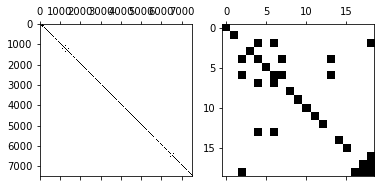

In [7]:
A, _ = df.assemble_system(a, b, bc)
A = A.array()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.spy(A)
ax2.spy(A[1:20,1:20])
plt.show()

Solve the linear problem using *mumps* direct sparse linear solver.

In [8]:
w = df.Function(W)
problem = df.LinearVariationalProblem(a, b, w, bc)
solver = df.LinearVariationalSolver(problem)
solver.parameters['linear_solver'] = 'mumps'

tick0 = time()
solver.solve()
tick1 = time()
print("elapsed = ", tick1 - tick0)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
elapsed =  0.39852356910705566


Show results with pyplot.

Plot of u[0] 

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


TypeError: __init__() got an unexpected keyword argument 'location'

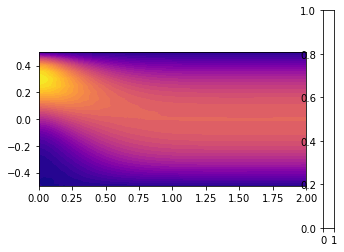

In [9]:
u, p = w.split()
u.rename("u", "velocity")
p.rename("p", "pressure")

for unknown in u[0], u[1], p:
    print("Plot of", unknown, "\n")
    figure = df.plot(unknown, cmap=plt.cm.plasma)
    plt.colorbar(figure, location='bottom')
    plt.show()

Plot velocity profile at the ouflow. Compare it to a parabolic profile (Poiseuille flow).

In [ ]:
Y = np.linspace(-0.5, 0.5)
U_num = [u(L, y)[0] for y in Y]
U_max = max(U_num)
U_poi = [U_max*(1.0 - (y/R)**2) for y in Y]
plt.plot(Y, U_num, label='NUMERICAL')
plt.scatter(Y, U_poi, label='POISEUILLE', color='orange')
plt.legend()
plt.show()

## Exercises 
1) In the definition of `v_inflow`, why is there `5.0/8.0` and not `5/8`?
2) Can we prevent the emergence of Poiseuille flow by making $\mu$ very small or inflow speed very large?
3) Can we use conjugate gradient method to solve the algebraic system?
4) Try mixed elements other than Tayler-Hood from the list below. (Spoiler: the first  two will not work very well.)
    * CG 1 for velocity, CG 1 for pressure
    * CG 2 for velocity, CG 2 for pressure
    * CG 2 for velocity, DG 0 for pressure (DG stands for Discontinuous Galerkin)
    * CR 1 for velocity, DG 0 for pressure (CR stands for Crouzeix-Raviart)
5) Experiment with different inflow conditions and non-zero external forces.

## Complete code

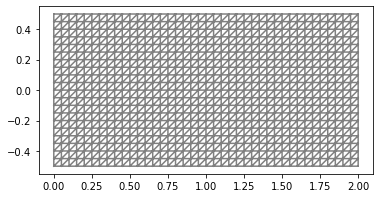

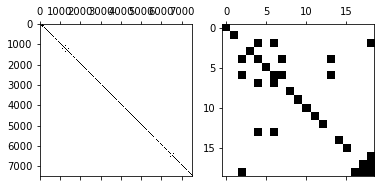

elapsed =  0.07689833641052246
Plot of u[0] 



TypeError: __init__() got an unexpected keyword argument 'location'

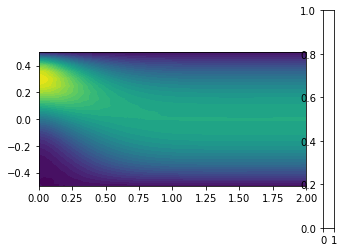

In [10]:
import dolfin as df
import matplotlib.pyplot as plt
import numpy as np
from time import time


# Create mesh.

R = 0.5    # half of distance between plates
L = 2.0    # length
n_x = 40   # x-resolution
n_y = 20   # y-resolution
mesh = df.RectangleMesh(df.Point(0, -R), df.Point(L, R), n_x, n_y)

df.plot(mesh)
plt.show()


# Identify boundaries.

# define boundary as a class
class Inflow(df.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and df.near(x[0], 0.0)

inflow = Inflow()

# or with AutoSubDomain
outflow = df.AutoSubDomain(lambda x, on_boundary: on_boundary and df.near(x[0], L))
walls = df.AutoSubDomain(lambda x, on_boundary: on_boundary and df.near(abs(x[1]), R))

# mark boundary parts
bdary = df.MeshFunction('size_t', mesh, mesh.topology().dim()-1, 0)
inflow.mark(bdary, 1)
outflow.mark(bdary, 2)
walls.mark(bdary, 3)


# Define mixed function space for pressure and velocity.

Ev = df.VectorElement("CG", mesh.ufl_cell(), 2) # 2 = quadratic elements
Ep = df.FiniteElement("CG", mesh.ufl_cell(), 1) # 1 = linear elements
E = df.MixedElement([Ev, Ep]) # Taylor-Hood mixed element
W = df.FunctionSpace(mesh, E)


# Declare boundary conditions.

v_wall = df.Constant((0.0, 0.0))
v_inflow = df.Expression(("5.0/8.0*(1.0 - x[1]/R)*pow(1.0 + x[1]/R, 4)", "0"), degree = 2, R = R) 
bc_wall = df.DirichletBC(W.sub(0), v_wall, bdary, 3)
bc_inflow = df.DirichletBC(W.sub(0), v_inflow, bdary, 1)
bc = [bc_inflow, bc_wall]


# Write variational formulation.

mu = df.Constant(1.0)  # dynamic viscosity
f = df.Constant((0.0, 0.0)) # external force
u, p = df.TrialFunctions(W)
v, q = df.TestFunctions(W)
a = mu*df.inner(df.grad(u), df.grad(v))*df.dx - p*df.div(v)*df.dx - q*df.div(u)*df.dx
b = df.inner(f,v)*df.dx


# Plot sparsity pattern of the linear system.

A, _ = df.assemble_system(a, b, bc)
A = A.array()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.spy(A)
ax2.spy(A[1:20,1:20])
plt.show()


# Solve the linear problem using *mumps* direct sparse linear solver.

w = df.Function(W)
problem = df.LinearVariationalProblem(a, b, w, bc)
solver = df.LinearVariationalSolver(problem)
solver.parameters['linear_solver'] = 'mumps'

tick0 = time()
solver.solve()
tick1 = time()
print("elapsed = ", tick1 - tick0)


# Show results with pyplot.

u, p = w.split()
u.rename("u", "velocity")
p.rename("p", "pressure")

for unknown in u[0], u[1], p:
    print("Plot of", unknown, "\n")
    figure = df.plot(unknown)
    plt.colorbar(figure, location='bottom')
    plt.show()


# Plot velocity profile at the ouflow. Compare it to a parabolic profile (Poiseuille flow).

Y = np.linspace(-0.5, 0.5)
U_num = [u(L, y)[0] for y in Y]
U_max = max(U_num)
U_poi = [U_max*(1.0 - (y/R)**2) for y in Y]
plt.plot(Y, U_num, label='NUMERICAL')
plt.scatter(Y, U_poi, label='POISEUILLE', color='orange')
plt.legend()
plt.show()